In [1]:
import numpy as np
from scipy.stats import lognorm
import matplotlib.pyplot as plt
import pymc3 as pm

In [2]:
%matplotlib notebook

<IPython.core.display.Javascript object>


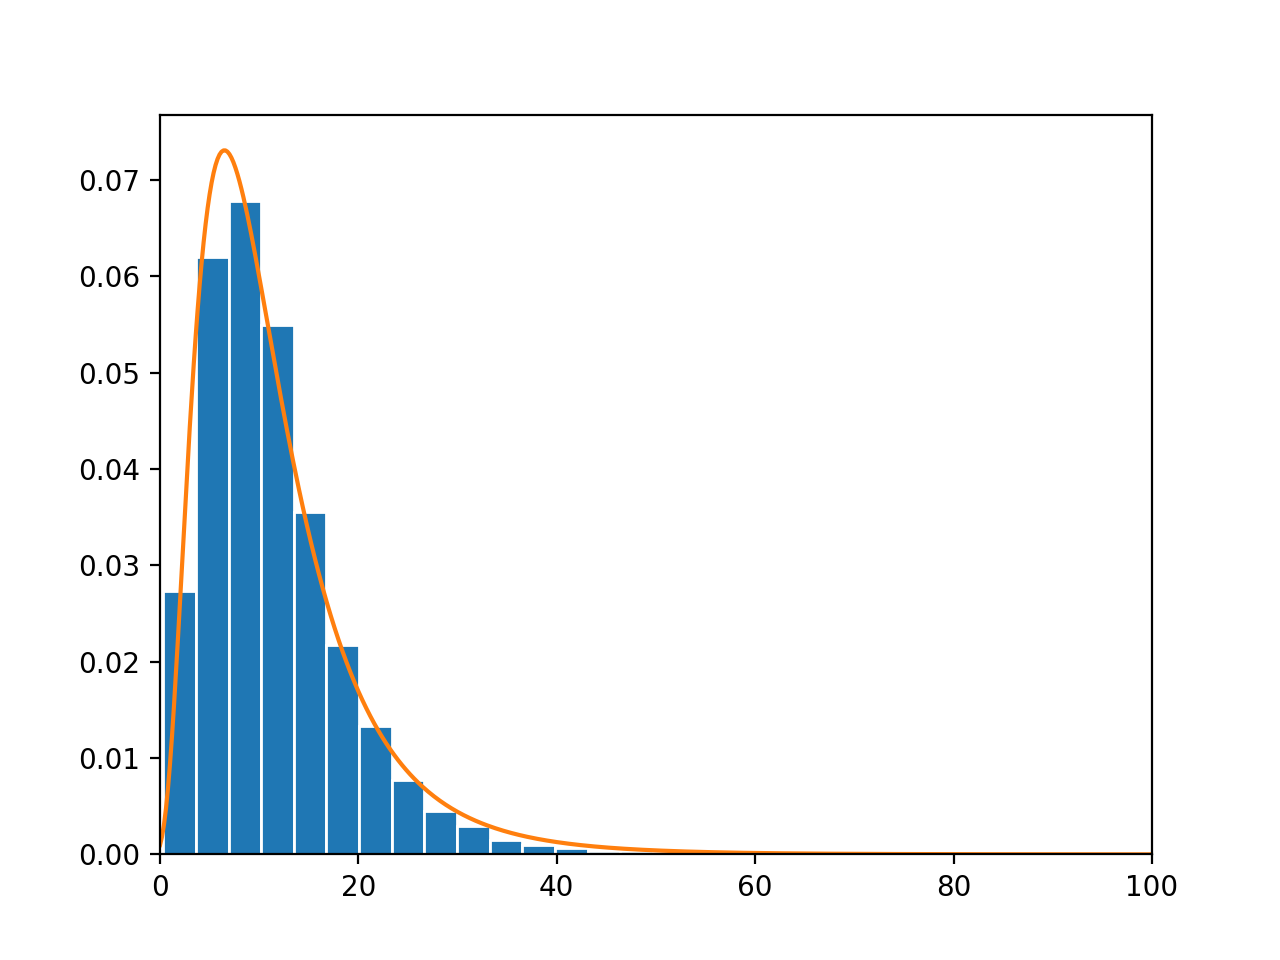

(0, 100)

In [3]:
data1 = np.loadtxt('./var_param.txt')
best_par, best_mu,best_sd = lognorm.fit(data1)
fit_x = np.linspace(0,1000,5000)
fit_y = lognorm.pdf(fit_x,best_par,best_mu,best_sd)
plt.figure()
plt.hist(data1,density=True,bins=500,edgecolor='w')
plt.plot(fit_x,fit_y)
#plt.yscale('log')
#plt.ylim(1e-7,2e-1)
plt.xlim(0,100)

<IPython.core.display.Javascript object>


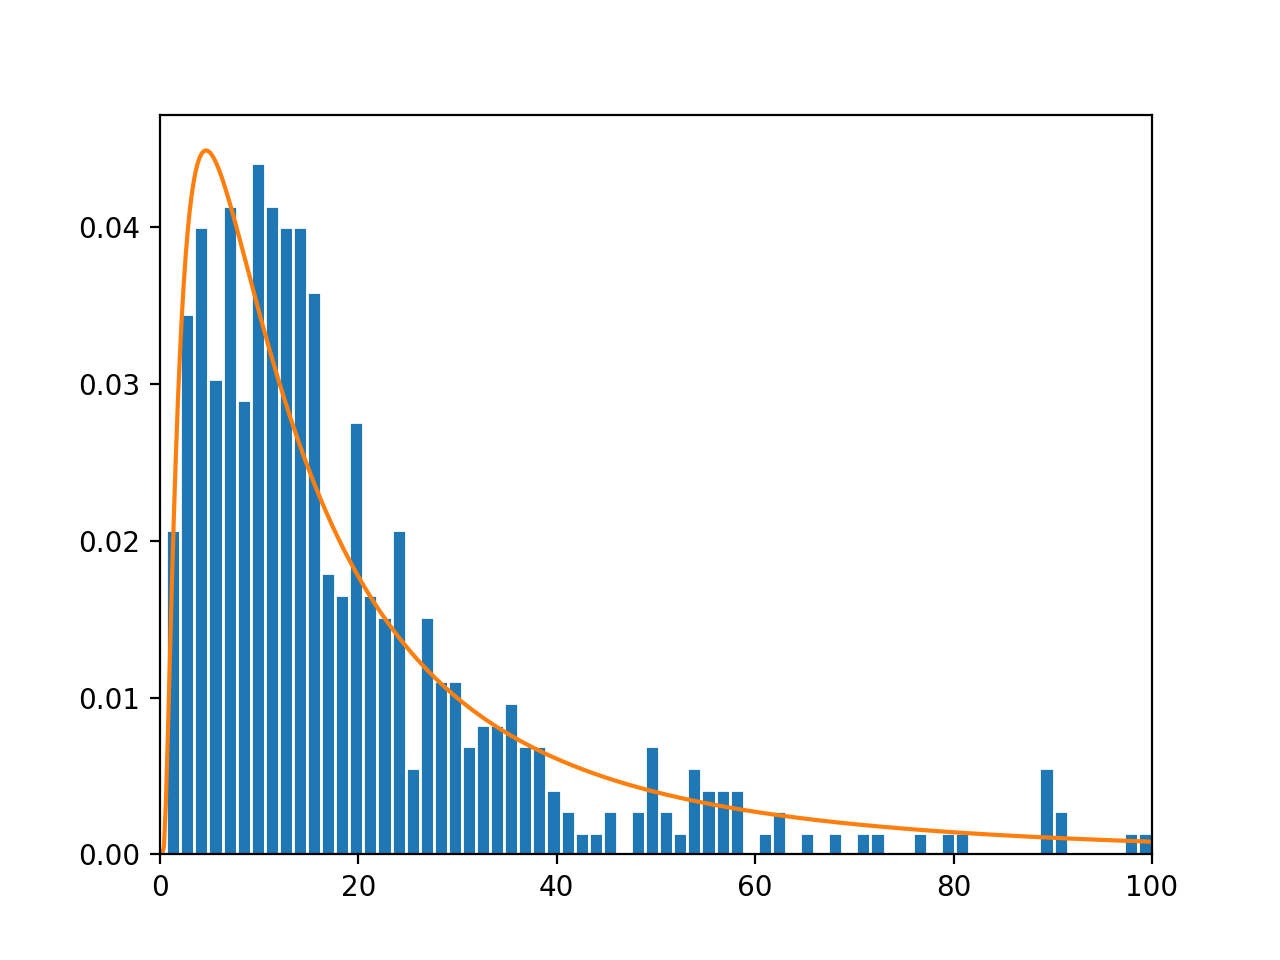

(0, 100)

In [4]:
data2 = np.loadtxt('./var_param_gps.txt')
best_par, best_mu,best_sd = lognorm.fit(data2)
fit_x = np.linspace(0,1000,5000)
fit_y = lognorm.pdf(fit_x,best_par,best_mu,best_sd)
plt.figure()
plt.hist(data2,density=True,bins=500,edgecolor='w')
plt.plot(fit_x,fit_y)
#plt.yscale('log')
#plt.ylim(1e-7,2e-1)
plt.xlim(0,100)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (12 chains in 12 jobs)
NUTS: [sigma, mu]
Sampling 12 chains: 100%|██████████| 144000/144000 [01:04<00:00, 2220.83draws/s]


<IPython.core.display.Javascript object>


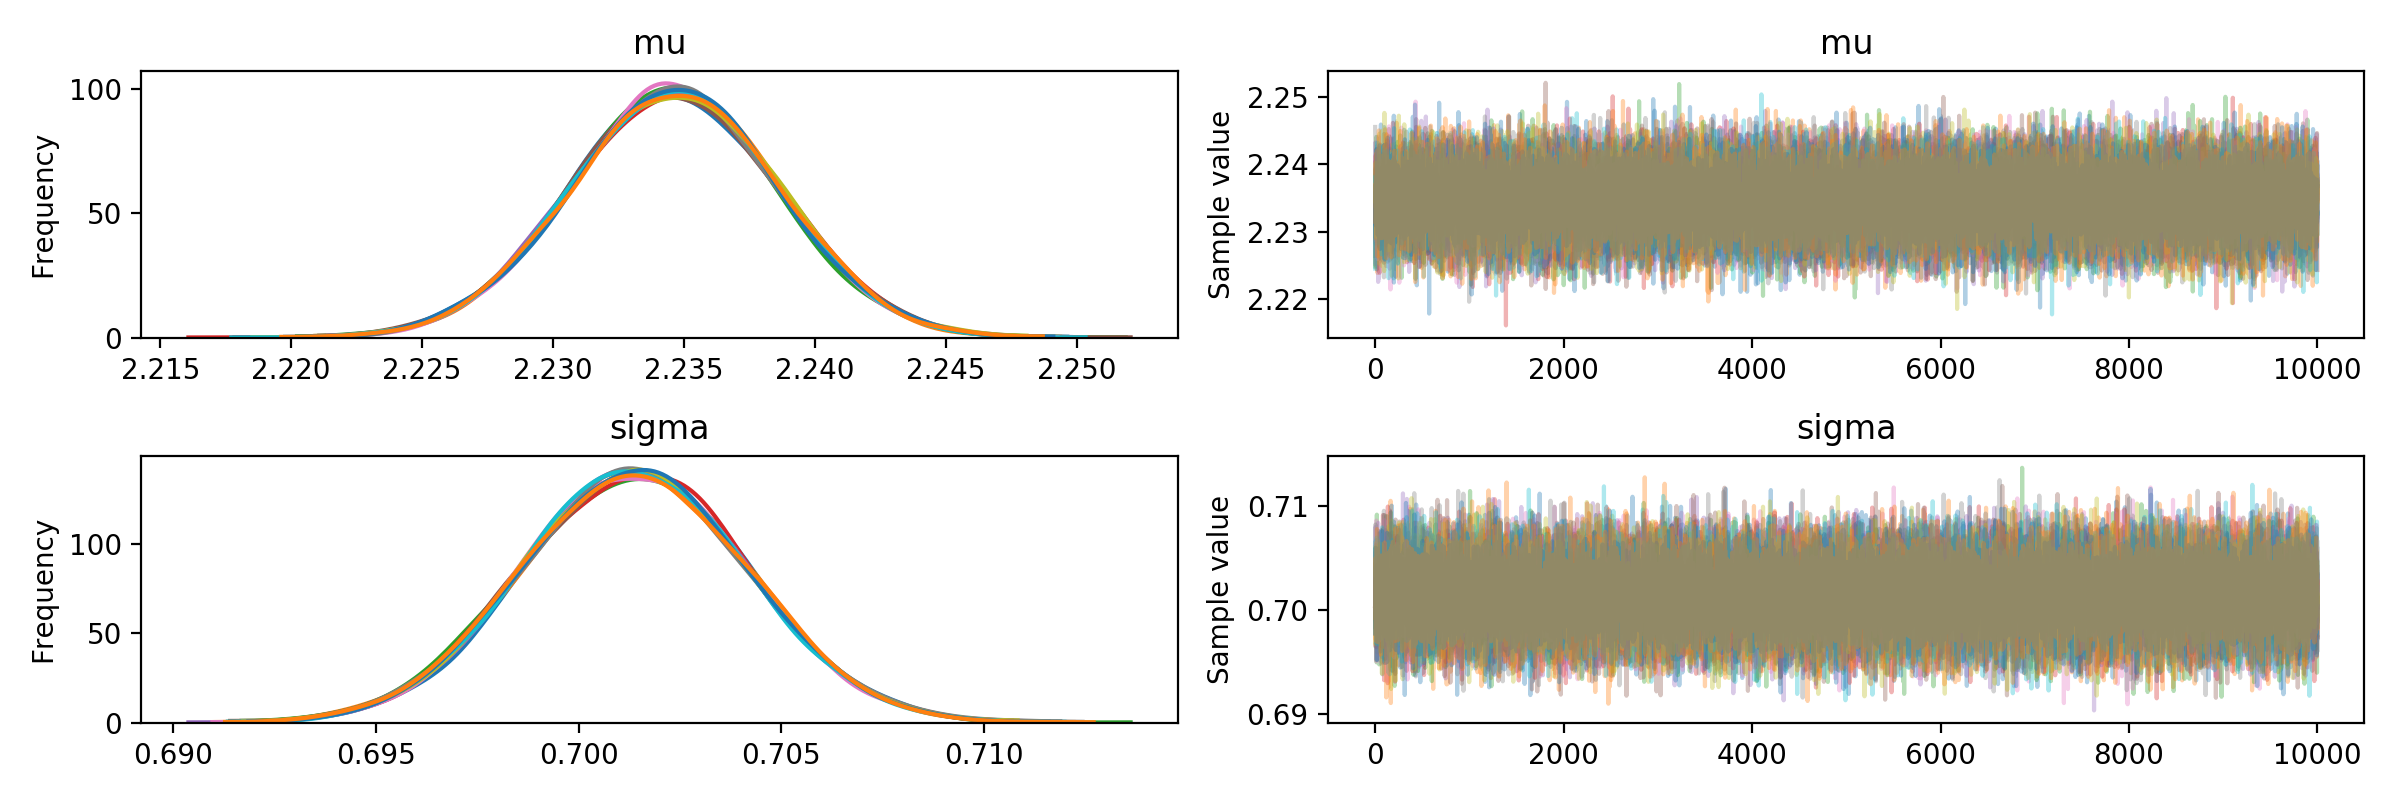

<IPython.core.display.Javascript object>


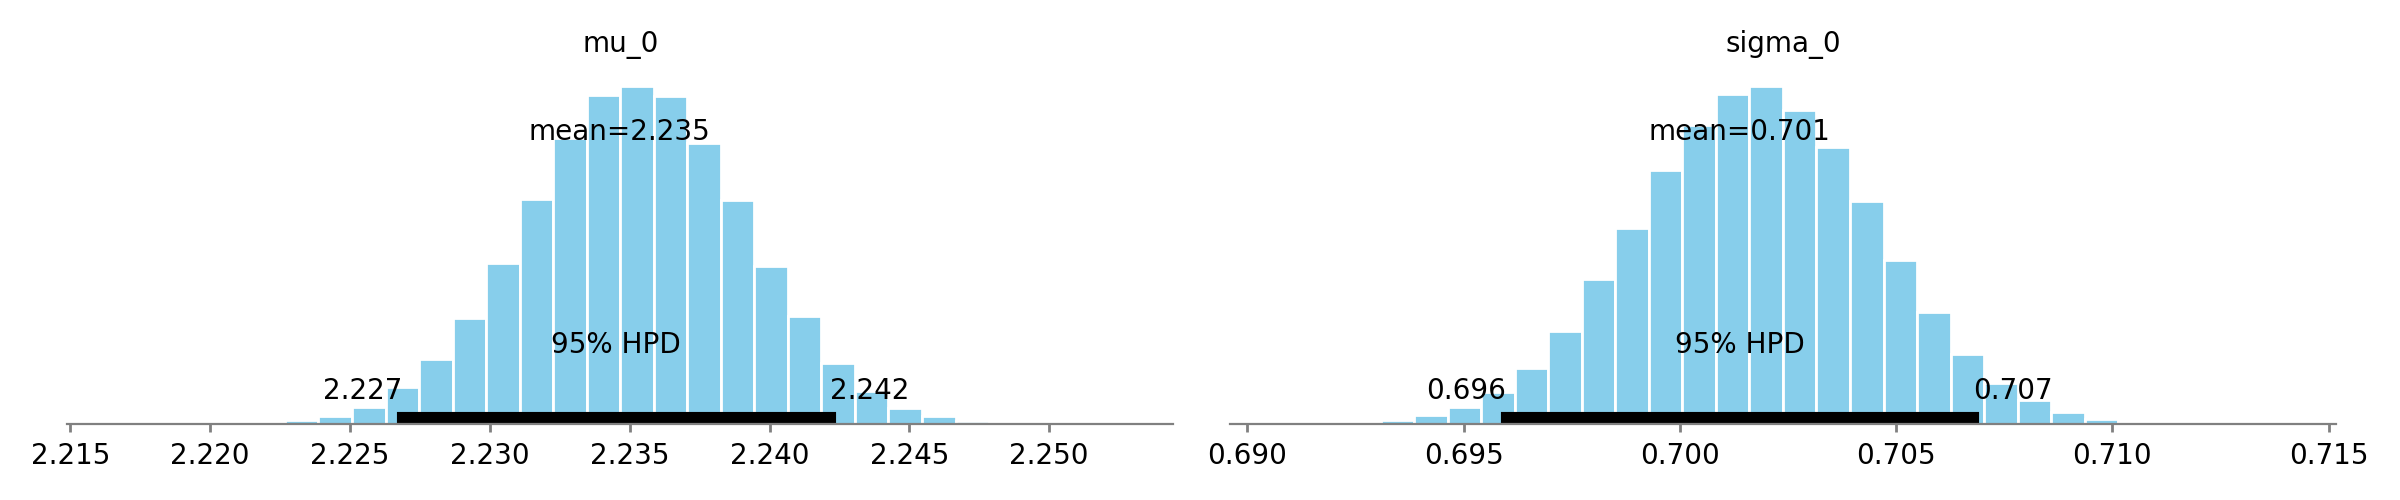

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
mu__0,2.234630,0.003904,0.000011,2.226859,2.242177,118820.251191,1.000004
sigma__0,0.701387,0.002755,0.000008,0.695984,0.706787,117164.941554,1.000002


In [27]:
with pm.Model() as model:
    mu = pm.Uniform('mu',0,40,shape=(1,))
    sd = pm.Uniform('sigma',0,40,shape=(1,))
    components = pm.Lognormal.dist(mu=mu,sd=sd, shape=(1,))
    like = pm.Mixture('like', w=[1], comp_dists=components, observed=data1)
    trace = pm.sample(10000,tune=2000,chains=12,cores=12)

pm.traceplot(trace)
pm.plot_posterior(trace)
pm.summary(trace)

<IPython.core.display.Javascript object>


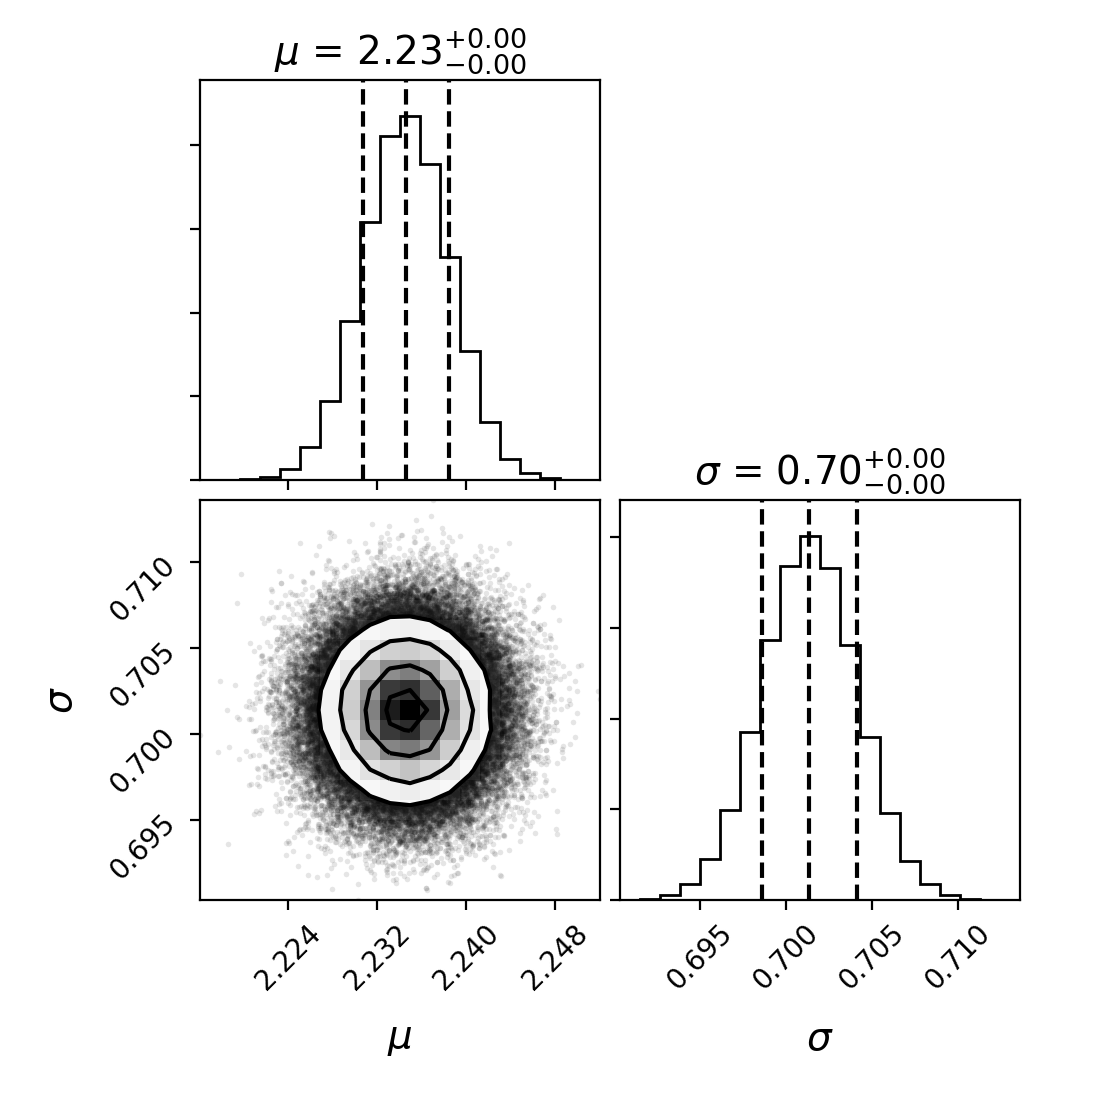

In [28]:
import corner

corner_data = list(zip(*np.array([trace.get_values('mu').transpose()[0],
                                  trace.get_values('sigma').transpose()[0]])))

cornplot = corner.corner(corner_data,quantiles=[0.16,0.5,0.84],show_titles=True,use_math_text=False,
                         labels = [r'$\mu$',r'$\sigma$'],
                         title_kwargs={"fontsize": 14},label_kwargs={"fontsize": 14})

<IPython.core.display.Javascript object>


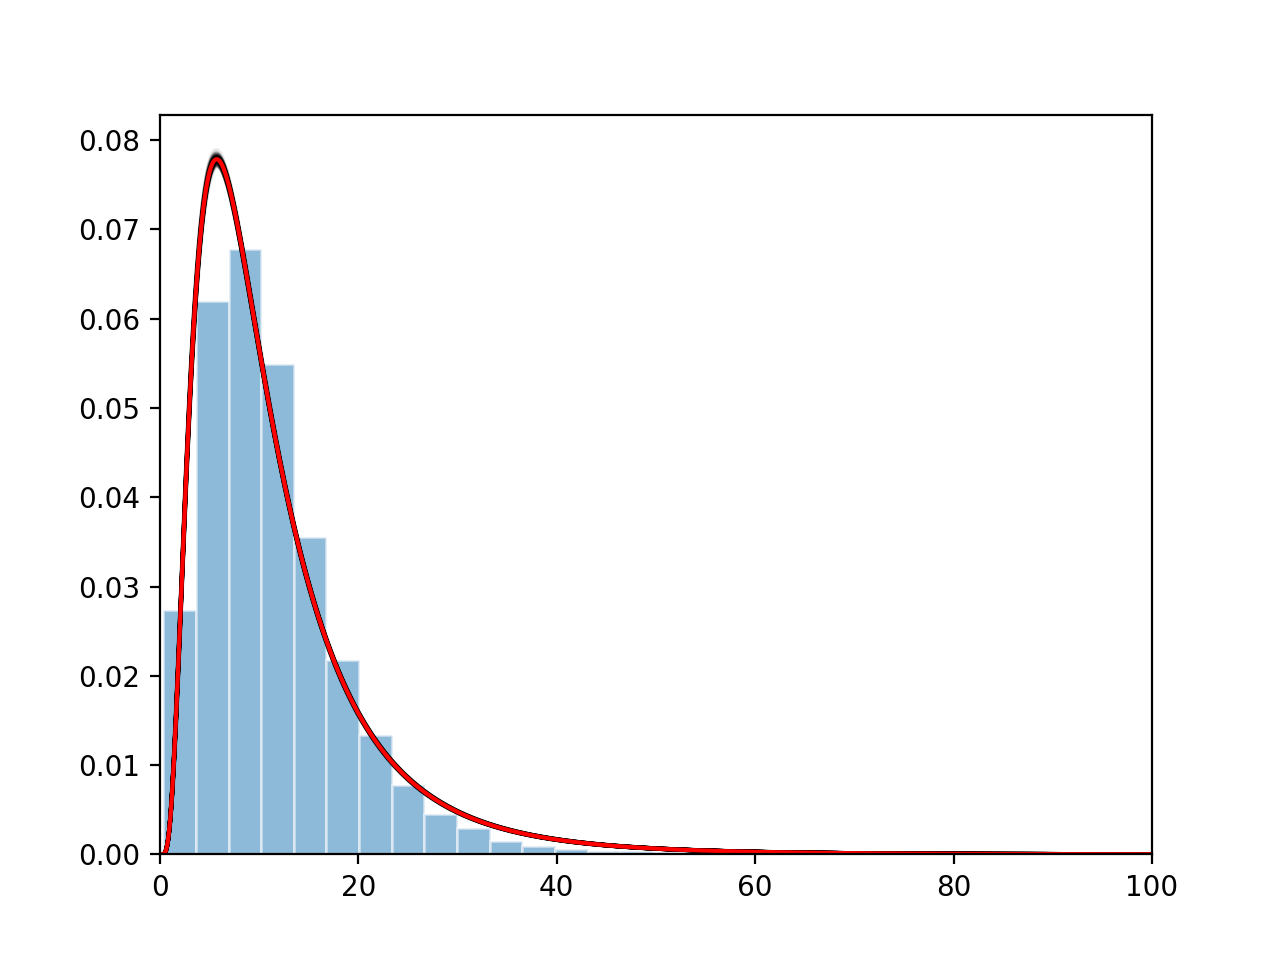

(0, 100)

In [37]:
def lognorm_func(x,mu,sd):
    return (x * sd * np.sqrt(2*np.pi))**-1 * np.exp(- (np.log(x)-mu)**2/(2*sd**2)) 

plt.figure()

plt.hist(data1,density=True,bins=500,edgecolor='w',alpha=0.5)

fit_x = np.linspace(0,1000,10000)
for i in np.random.randint(0,len(trace),size=100):
    plt.plot(fit_x,lognorm_func(fit_x,trace.get_values('mu')[i],trace.get_values('sigma')[i]),'-k',alpha=0.1)
    
plt.plot(fit_x,lognorm_func(fit_x,np.median(trace.get_values('mu')),np.median(trace.get_values('sigma'))),'-r')
plt.xlim(0,100)
#plt.plot(fit_x,0.389463*chi2.pdf(fit_x,16.584342),'--')
#plt.plot(fit_x,0.610537*chi2.pdf(fit_x,10.936716),'--')

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (12 chains in 12 jobs)
NUTS: [sigma, mu]
Sampling 12 chains: 100%|██████████| 144000/144000 [00:17<00:00, 8291.41draws/s] 


<IPython.core.display.Javascript object>


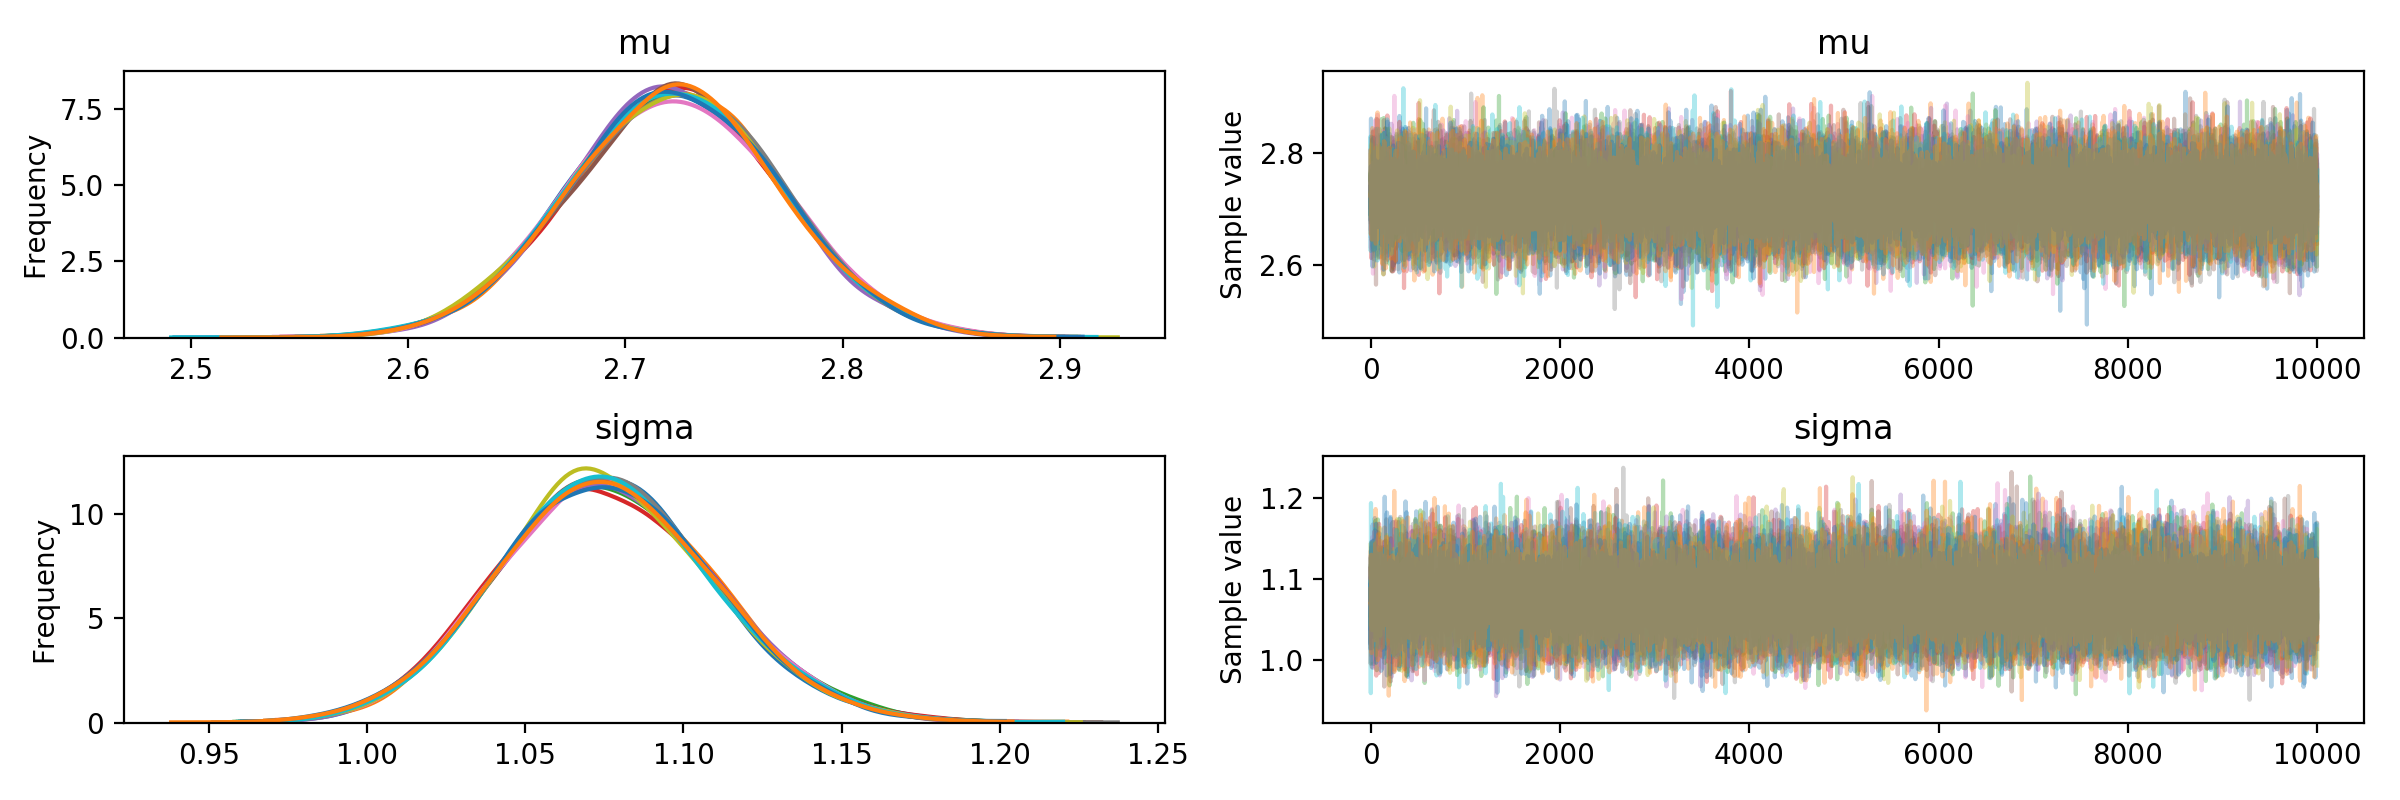

<IPython.core.display.Javascript object>


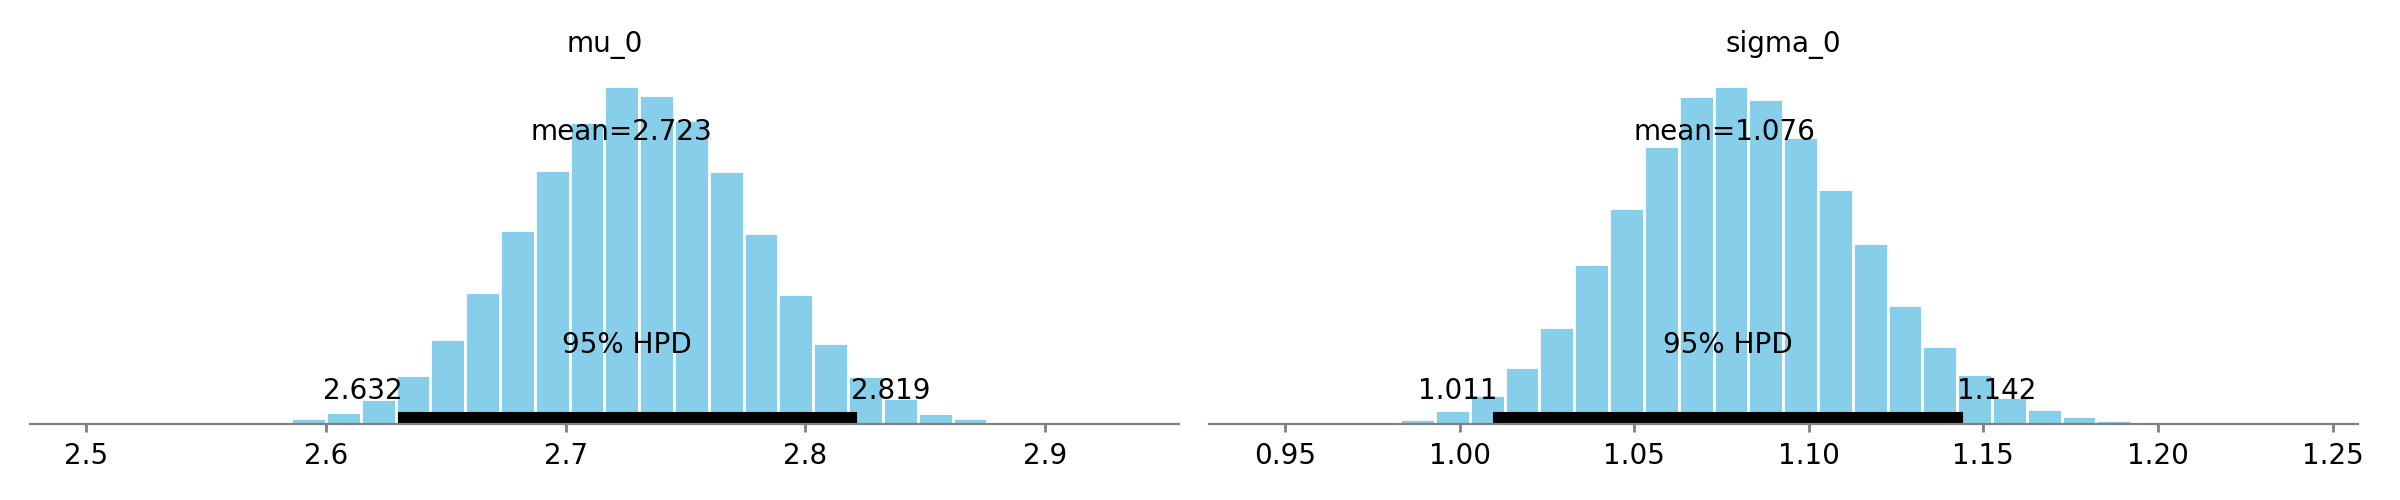

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
mu__0,2.723061,0.047708,0.000125,2.631910,2.819161,120750.840538,1.000019
sigma__0,1.075729,0.033515,0.000097,1.010948,1.142448,123594.026907,1.000012


In [38]:
with pm.Model() as model:
    mu = pm.Uniform('mu',0,40,shape=(1,))
    sd = pm.Uniform('sigma',0,40,shape=(1,))
    components = pm.Lognormal.dist(mu=mu,sd=sd, shape=(1,))
    like = pm.Mixture('like', w=[1], comp_dists=components, observed=data2)
    trace = pm.sample(10000,tune=2000,chains=12,cores=12)

pm.traceplot(trace)
pm.plot_posterior(trace)
pm.summary(trace)

<IPython.core.display.Javascript object>


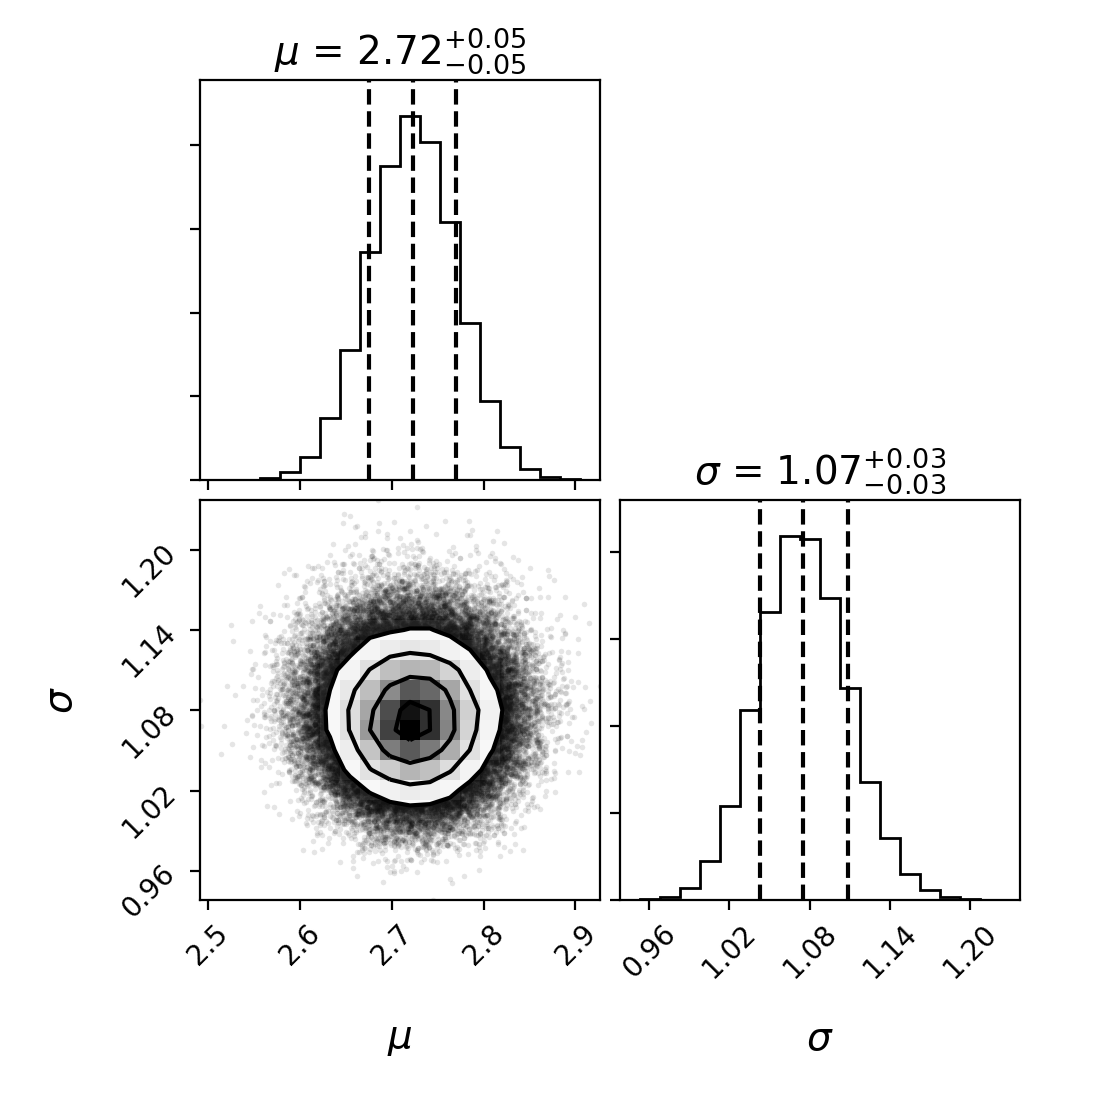

In [39]:
import corner

corner_data = list(zip(*np.array([trace.get_values('mu').transpose()[0],
                                  trace.get_values('sigma').transpose()[0]])))

cornplot = corner.corner(corner_data,quantiles=[0.16,0.5,0.84],show_titles=True,use_math_text=False,
                         labels = [r'$\mu$',r'$\sigma$'],
                         title_kwargs={"fontsize": 14},label_kwargs={"fontsize": 14})

<IPython.core.display.Javascript object>


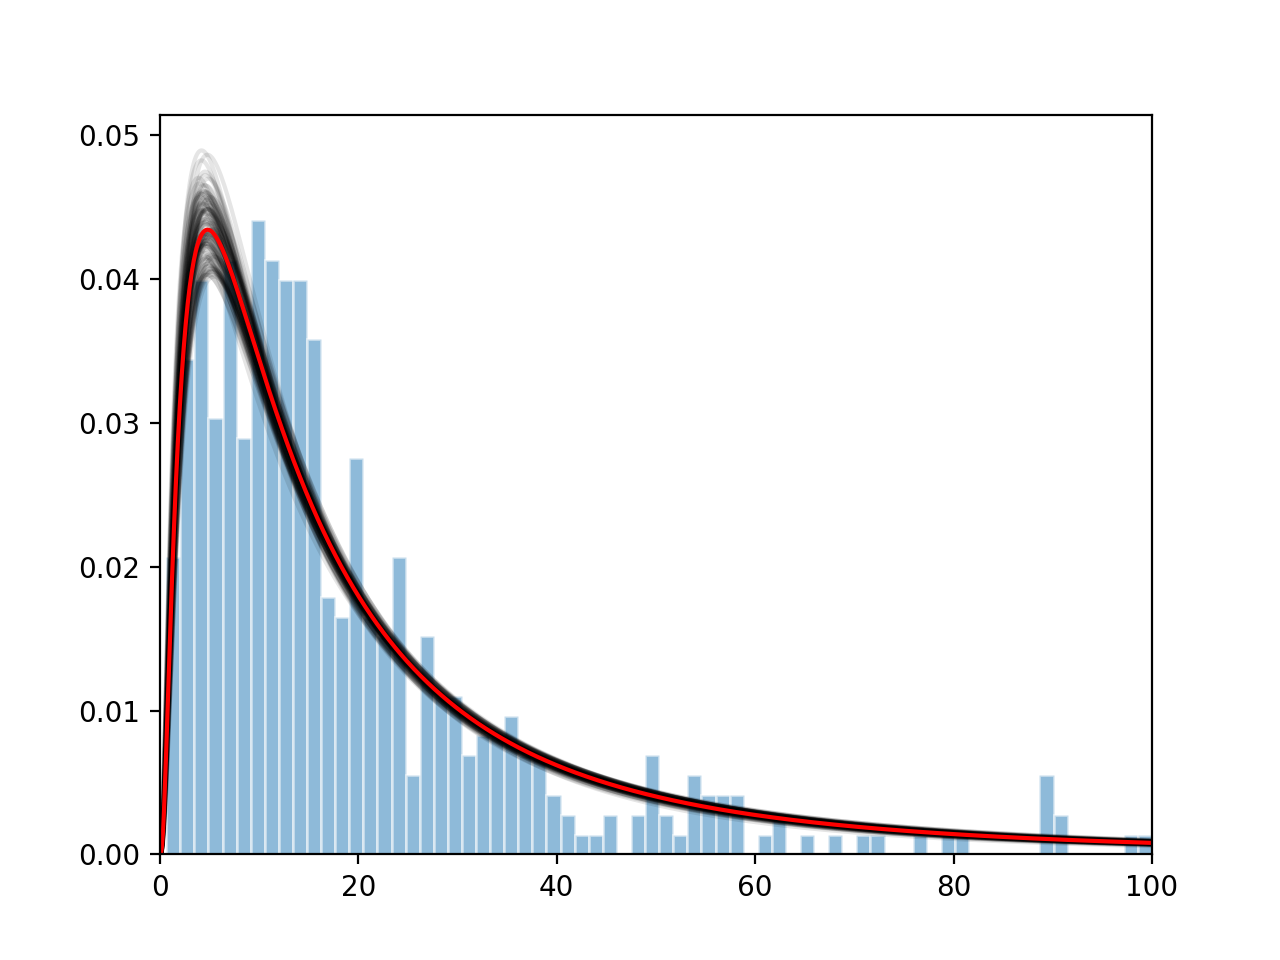

(0, 100)

In [40]:
def lognorm_func(x,mu,sd):
    return (x * sd * np.sqrt(2*np.pi))**-1 * np.exp(- (np.log(x)-mu)**2/(2*sd**2)) 

plt.figure()

plt.hist(data2,density=True,bins=500,edgecolor='w',alpha=0.5)

fit_x = np.linspace(0,1000,10000)
for i in np.random.randint(0,len(trace),size=100):
    plt.plot(fit_x,lognorm_func(fit_x,trace.get_values('mu')[i],trace.get_values('sigma')[i]),'-k',alpha=0.1)
    
plt.plot(fit_x,lognorm_func(fit_x,np.median(trace.get_values('mu')),np.median(trace.get_values('sigma'))),'-r')
plt.xlim(0,100)
#plt.plot(fit_x,0.389463*chi2.pdf(fit_x,16.584342),'--')
#plt.plot(fit_x,0.610537*chi2.pdf(fit_x,10.936716),'--')